<a href="https://colab.research.google.com/github/ABHIRAM199/MY-ML-Projects/blob/main/Brain_Tumor_Classification__ABHIRAM_TV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brain Tumor Classification Using Pretrained Models with Attention Mechanisms

classifying brain tumors using a combination of deep learning models. With the power of CNNs, I explored various architectures to accurately categorize MRI images into four categories: glioma, meningioma, pituitary tumor, and no tumor.

I tested several pre-trained architectures, including VGG16, VGG19, MobileNet, Xception, and InceptionV3. Each model was fine-tuned and enhanced with techniques such as multi-head attention, Gaussian noise regularization, batch normalization, and dropout layers for improved performance and robustness.

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np  # Import numpy library for numerical operations
import pandas as pd  # Import pandas library for data manipulation and analysis
import seaborn as sns  # Import seaborn library for data visualization


In [3]:
import os

# Assuming you have your train image paths and labels in lists
image_paths = []  # This should contain your image paths
labels = []       # This should contain your corresponding labels

# Example for populating image_paths and labels (adjust as needed)
train_data_path = '/content/drive/My Drive/brain_tumor/BrainTumor_1/Train'
categories = ["glioma", "meningioma", "notumor", "pituitary"]

for category in categories:
    category_path = os.path.join(train_data_path, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_paths.append(image_path)
        labels.append(category)

# Create a DataFrame
df = pd.DataFrame({"image_path": image_paths, "label": labels})


In [6]:
df.head()

,image_path,label
0,/content/drive/My Drive/brain_tumor/BrainTumor...,glioma
1,/content/drive/My Drive/brain_tumor/BrainTumor...,glioma
2,/content/drive/My Drive/brain_tumor/BrainTumor...,glioma
3,/content/drive/My Drive/brain_tumor/BrainTumor...,glioma
4,/content/drive/My Drive/brain_tumor/BrainTumor...,glioma


In [6]:
df.tail()

,image_path,label
23126,/content/drive/My Drive/brain_tumor/BrainTumor...,pituitary
23127,/content/drive/My Drive/brain_tumor/BrainTumor...,pituitary
23128,/content/drive/My Drive/brain_tumor/BrainTumor...,pituitary
23129,/content/drive/My Drive/brain_tumor/BrainTumor...,pituitary
23130,/content/drive/My Drive/brain_tumor/BrainTumor...,pituitary


In [7]:
df.shape

(23131, 2)

In [8]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [9]:
df['label'].unique()

array(['glioma', 'meningioma', 'notumor', 'pituitary'], dtype=object)

In [10]:
df['label'].value_counts()

,count
label,
notumor,6380
pituitary,5891
meningioma,5556
glioma,5304


<ipython-input-4-fda0f37fbbab>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="label", palette="viridis")


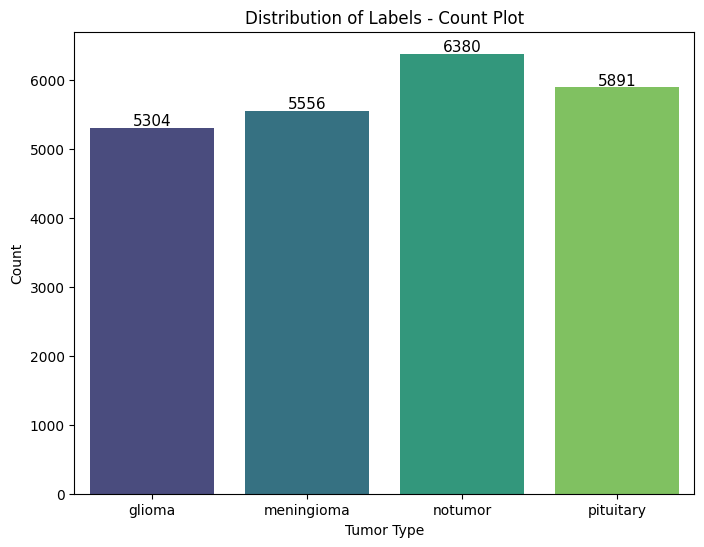

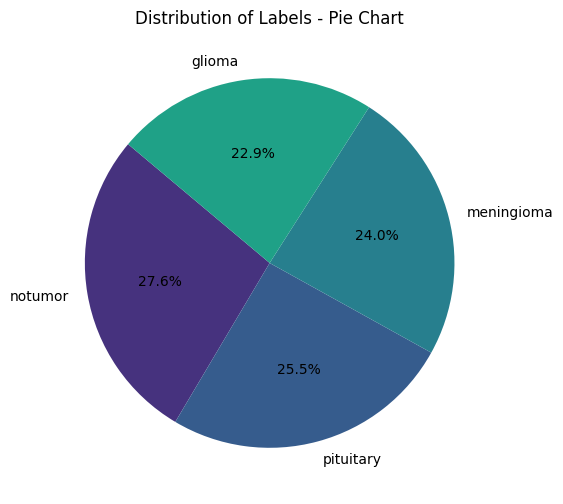

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="label", palette="viridis")
plt.title("Distribution of Labels - Count Plot")
plt.xlabel("Tumor Type")
plt.ylabel("Count")

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.show()

label_counts = df['label'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
plt.title("Distribution of Labels - Pie Chart")
plt.show()

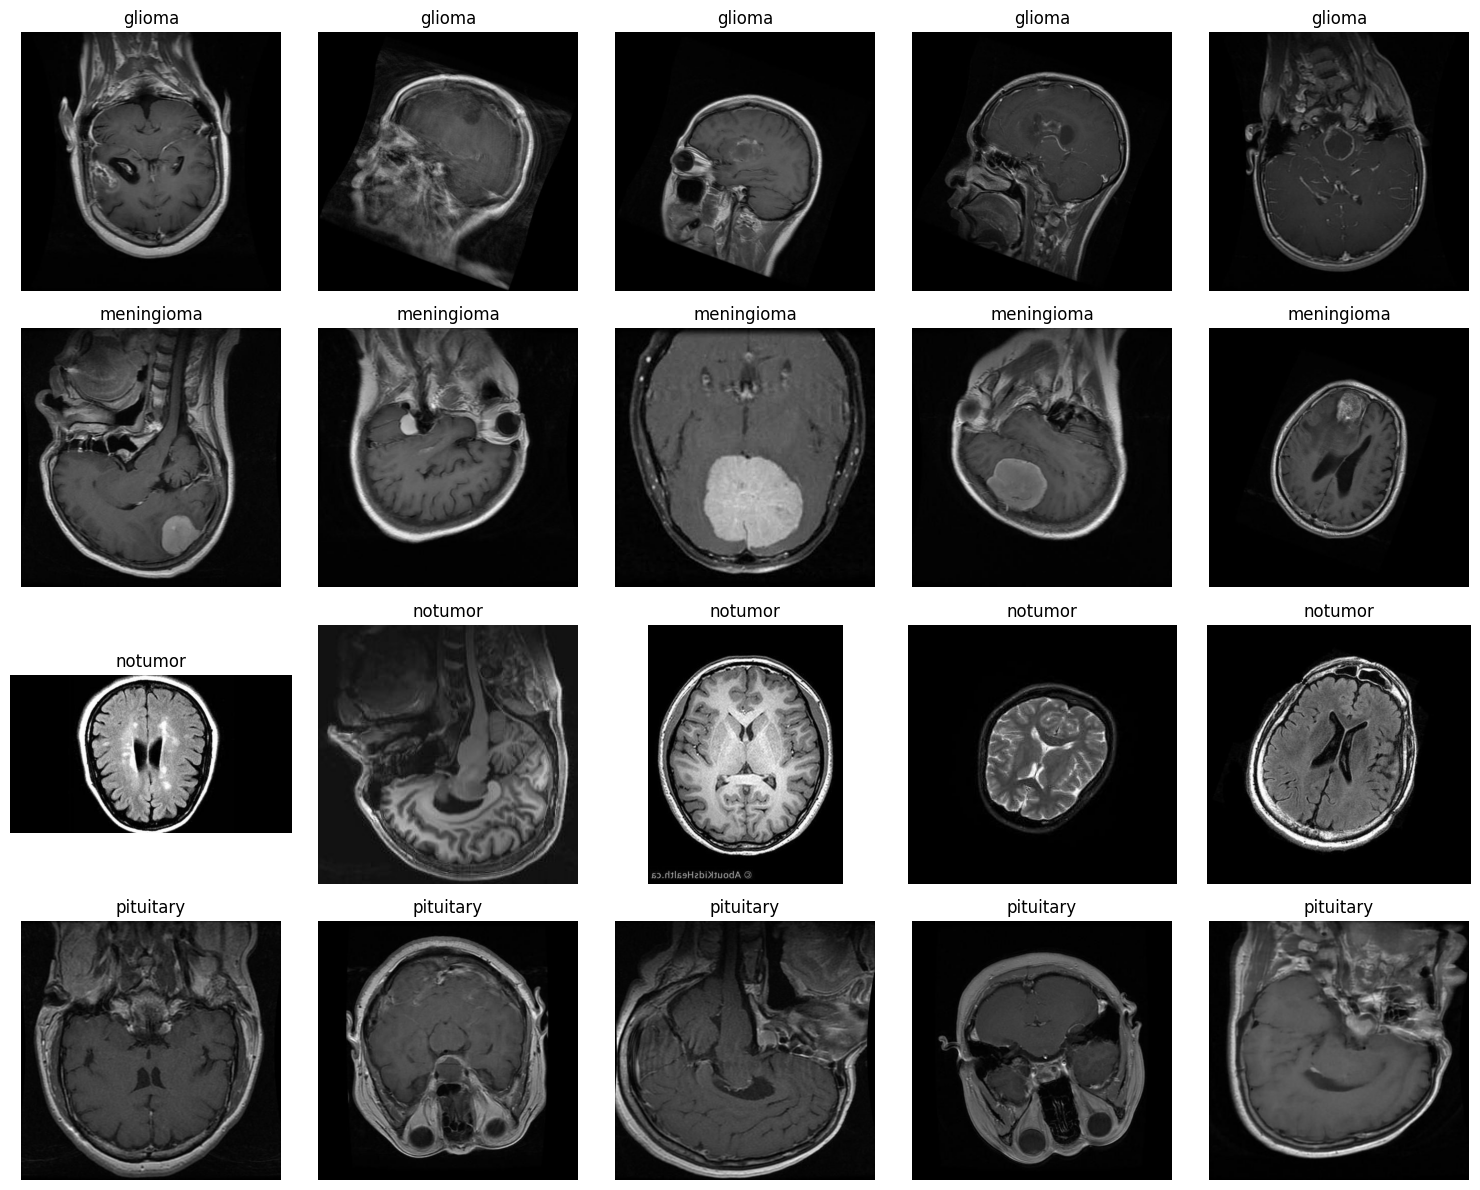

In [5]:
import cv2

num_images = 5

plt.figure(figsize=(15, 12))

for i, category in enumerate(categories):
    category_images = df[df['label'] == category]['image_path'].iloc[:num_images]

    for j, img_path in enumerate(category_images):

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(len(categories), num_images, i * num_images + j + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(category)

plt.tight_layout()
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['category_encoded'] = label_encoder.fit_transform(df['label'])

In [7]:
df = df[['image_path', 'category_encoded']]

In [8]:
from imblearn.over_sampling import RandomOverSampler

In [9]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['image_path']], df['category_encoded'])

In [10]:
df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['category_encoded'] = y_resampled

In [11]:
print("\nClass distribution after oversampling:")
print(df_resampled['category_encoded'].value_counts())


Class distribution after oversampling:
category_encoded
0    6380
1    6380
2    6380
3    6380
Name: count, dtype: int64


In [13]:
df_resampled

,image_path,category_encoded
0,/content/drive/My Drive/brain_tumor/BrainTumor...,0
1,/content/drive/My Drive/brain_tumor/BrainTumor...,0
2,/content/drive/My Drive/brain_tumor/BrainTumor...,0
3,/content/drive/My Drive/brain_tumor/BrainTumor...,0
4,/content/drive/My Drive/brain_tumor/BrainTumor...,0
...,...,...
25515,/content/drive/My Drive/brain_tumor/BrainTumor...,3
25516,/content/drive/My Drive/brain_tumor/BrainTumor...,3
25517,/content/drive/My Drive/brain_tumor/BrainTumor...,3
25518,/content/drive/My Drive/brain_tumor/BrainTumor...,3


In [12]:
# Import required libraries for handling time, file operations, and image manipulation
import time                                                                             # For tracking execution time of code
import shutil                                                                           # For high-level file operations (e.g., copying files)
import pathlib                                                                          # For handling file system paths
import itertools                                                                        # For creating iterators to generate combinations
from PIL import Image                                                                   # For image processing and manipulation

# Import visualization and data analysis libraries
import cv2                                                                              # For image processing (OpenCV library)
import seaborn as sns                                                                   # For data visualization, setting dark grid style
sns.set_style('darkgrid')                                                               # Set default style for seaborn plots
import matplotlib.pyplot as plt                                                         # For plotting graphs and images

# Import sklearn modules for model evaluation and dataset splitting
from sklearn.model_selection import train_test_split                                    # For splitting data into train and test sets
from sklearn.metrics import confusion_matrix, classification_report                     # For model evaluation metrics

# Import TensorFlow and Keras libraries for deep learning model development
import tensorflow as tf                                                                 # Main TensorFlow library
from tensorflow import keras                                                            # High-level API for building and training models
from tensorflow.keras.models import Sequential                                          # For creating a sequential model (layer-by-layer)
from tensorflow.keras.optimizers import Adam, Adamax                                    # Optimizers for gradient descent
from tensorflow.keras.preprocessing.image import ImageDataGenerator                     # For augmenting images
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
# Layer classes for building CNN: Conv2D (convolution), MaxPooling2D, Flatten (for dense layers), Dense (fully connected), Activation, Dropout, and BatchNormalization
from tensorflow.keras import regularizers                                               # For applying regularization (e.g., L2) to layers to reduce overfitting

# Suppress warning messages for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Print a check message to verify all libraries are loaded without errors
print('check')                                                                         # Verify that all imports were successful


check


In [13]:
# Convert the data type of the 'category_encoded' column in df_resampled to a string type
df_resampled['category_encoded'] = df_resampled['category_encoded'].astype(str)


In [14]:
# Split df_resampled into training (80%) and temporary (20%) datasets
train_df_new, temp_df_new = train_test_split(
    df_resampled,              # DataFrame to split
    train_size=0.8,            # 80% of data for training
    shuffle=True,              # Shuffle the data before splitting
    random_state=42,           # Set seed for reproducibility
    stratify=df_resampled['category_encoded']  # Stratify by 'category_encoded' to maintain class balance
)

# Further split the temporary dataset (20%) into validation and test sets (each 10% of original data)
valid_df_new, test_df_new = train_test_split(
    temp_df_new,               # DataFrame to split
    test_size=0.5,             # 50% of temp_df_new (10% of original) for test, remaining for validation
    shuffle=True,              # Shuffle the data before splitting
    random_state=42,           # Set seed for reproducibility
    stratify=temp_df_new['category_encoded']  # Stratify by 'category_encoded' to maintain class balance
)


In [15]:
# Import the ImageDataGenerator class from Keras to handle image data augmentation and preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters for data processing and model input
batch_size = 16         # Number of images processed in each batch
img_size = (224, 224)   # Target size for resizing images
channels = 3            # Number of color channels (3 for RGB)
img_shape = (img_size[0], img_size[1], channels)  # Full shape of input images (height, width, channels)

# Instantiate ImageDataGenerators for training and testing with rescaling
tr_gen = ImageDataGenerator(rescale=1./255)  # Training data generator with pixel value rescaling
ts_gen = ImageDataGenerator(rescale=1./255)  # Testing and validation data generator with rescaling

# Create a training data generator from the DataFrame
train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,           # DataFrame containing training data
    x_col='image_path',      # Column in DataFrame with image file paths
    y_col='category_encoded', # Column with target labels
    target_size=img_size,    # Resize images to target size (224x224)
    class_mode='sparse',     # Sparse mode for integer-encoded labels
    color_mode='rgb',        # Load images in RGB color mode
    shuffle=True,            # Shuffle images for randomness in training
    batch_size=batch_size    # Process images in batches of size 16
)

# Create a validation data generator from the DataFrame
valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,            # DataFrame containing validation data
    x_col='image_path',      # Column in DataFrame with image file paths
    y_col='category_encoded', # Column with target labels
    target_size=img_size,    # Resize images to target size (224x224)
    class_mode='sparse',     # Sparse mode for integer-encoded labels
    color_mode='rgb',        # Load images in RGB color mode
    shuffle=True,            # Shuffle images for variety in validation set
    batch_size=batch_size    # Process images in batches of size 16
)

# Create a test data generator from the DataFrame
test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,             # DataFrame containing test data
    x_col='image_path',      # Column in DataFrame with image file paths
    y_col='category_encoded', # Column with target labels
    target_size=img_size,    # Resize images to target size (224x224)
    class_mode='sparse',     # Sparse mode for integer-encoded labels
    color_mode='rgb',        # Load images in RGB color mode
    shuffle=False,           # Do not shuffle test images to ensure consistency in evaluation
    batch_size=batch_size    # Process images in batches of size 16
)


Found 20416 validated image filenames belonging to 4 classes.
Found 2552 validated image filenames belonging to 4 classes.
Found 2552 validated image filenames belonging to 4 classes.


In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [17]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using CPU


In [19]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [35]:
# Import necessary layers, models, and optimizers from Keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (GlobalAveragePooling2D, Dense, Dropout, BatchNormalization,
                                     GaussianNoise, Input, MultiHeadAttention, Reshape)
from tensorflow.keras.optimizers import Adam

# Define a function to create a VGG16-based model with added attention and custom layers
def create_vgg16_model(input_shape):

    # Define the input shape for the model
    inputs = Input(shape=input_shape)

    # Load the VGG16 base model with pre-trained weights (ImageNet)
    # Exclude the top layer (include_top=False) to add custom layers
    base_model = VGG16(weights='imagenet', input_tensor=inputs, include_top=False)

    # Freeze all layers in the base model to retain pre-trained weights during training
    for layer in base_model.layers:
        layer.trainable = False

    # Extract the output of the base model for further processing
    x = base_model.output

    # Define dimensions for reshaping
    height, width, channels = 7, 7, 512  # Output dimensions from VGG16

    # Reshape output for Multi-Head Attention layer
    x = Reshape((height * width, channels))(x)

    # Apply Multi-Head Attention layer to capture feature interactions
    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)

    # Reshape back to original spatial dimensions
    attention_output = Reshape((height, width, channels))(attention_output)

    # Add Gaussian Noise to introduce slight randomness and enhance generalization
    x = GaussianNoise(0.25)(attention_output)

    # Global Average Pooling to reduce spatial dimensions and keep essential features
    x = GlobalAveragePooling2D()(x)

    # Fully connected layer with ReLU activation
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)  # Normalize activations to improve stability
    x = GaussianNoise(0.25)(x)   # Add Gaussian noise again for regularization
    x = Dropout(0.25)(x)         # Dropout to prevent overfitting

    # Output layer with softmax activation for multi-class classification
    outputs = Dense(4, activation='softmax')(x)

    # Define the model with specified inputs and outputs
    model = Model(inputs=inputs, outputs=outputs)

    return model

# Set the input shape for the model (224x224 image with 3 color channels)
input_shape = (224, 224, 3)

# Instantiate the model using the create_vgg16_model function
cnn_model = create_vgg16_model(input_shape)

# Compile the model with Adam optimizer and set up loss and evaluation metrics
cnn_model.compile(optimizer=Adam(learning_rate=0.0001),  # Adam optimizer with specified learning rate
                  loss='sparse_categorical_crossentropy', # Loss function for integer-encoded labels
                  metrics=['accuracy'])                  # Track accuracy during training and testing


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [36]:
# Train the CNN model and store the training history
history = cnn_model.fit(
    train_gen_new,                  # Training data generator
    validation_data=valid_gen_new,  # Validation data generator
    epochs=5,                       # Number of times the model will iterate over the training data
    callbacks=[early_stopping],     # List of callbacks, including EarlyStopping to halt training if validation performance does not improve
    verbose=1                       # Verbosity mode; 1 displays progress bars and training details
)


Epoch 1/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 163s 114ms/step - accuracy: 0.7667 - loss: 0.6256 - val_accuracy: 0.7398 - val_loss: 0.7454
Epoch 2/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 135s 105ms/step - accuracy: 0.8833 - loss: 0.3242 - val_accuracy: 0.7704 - val_loss: 0.7078
Epoch 3/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 143s 106ms/step - accuracy: 0.9154 - loss: 0.2411 - val_accuracy: 0.8977 - val_loss: 0.2966
Epoch 4/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 143s 107ms/step - accuracy: 0.9294 - loss: 0.1986 - val_accuracy: 0.8342 - val_loss: 0.5016
Epoch 5/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 142s 110ms/step - accuracy: 0.9403 - loss: 0.1723 - val_accuracy: 0.7708 - val_loss: 0.6899


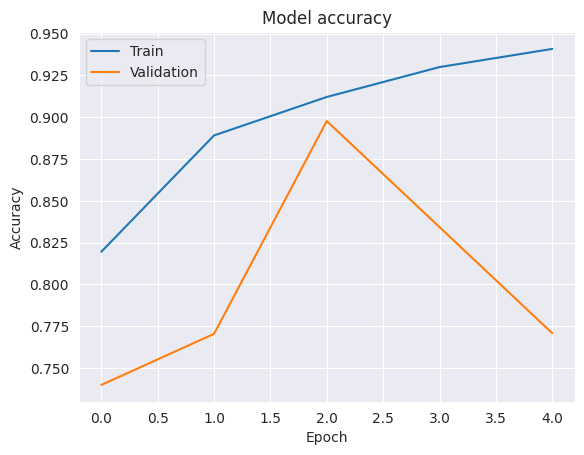

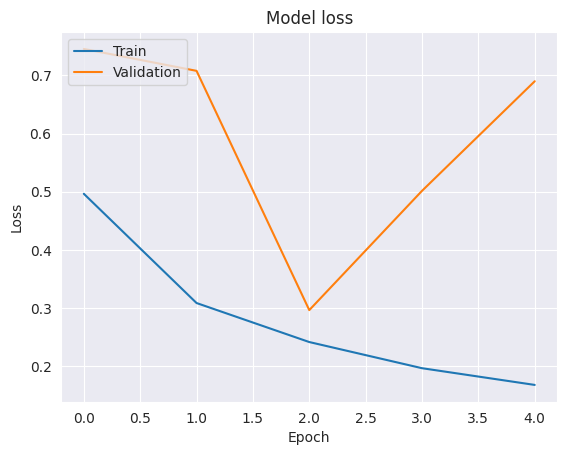

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [38]:
test_labels = test_gen_new.classes
predictions = cnn_model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

160/160 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step


In [39]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.95      0.76      0.84       638
           1       0.50      0.97      0.66       638
           2       0.98      0.90      0.94       638
           3       0.99      0.35      0.51       638

    accuracy                           0.74      2552
   macro avg       0.86      0.74      0.74      2552
weighted avg       0.86      0.74      0.74      2552



In [40]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

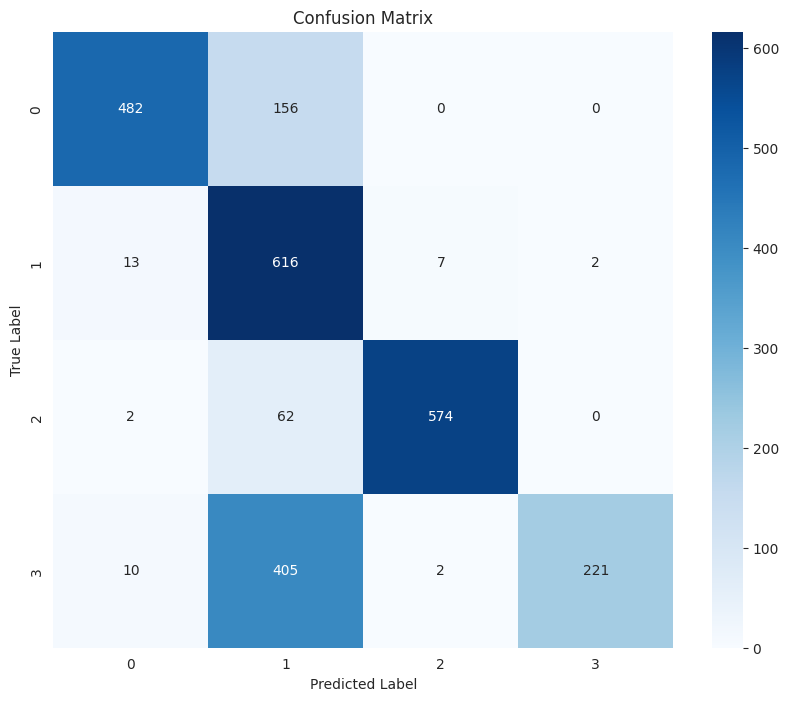

In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [42]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_vgg19_model(input_shape):

    inputs = Input(shape=input_shape)

    base_model = VGG19(weights='imagenet', input_tensor=inputs, include_top=False)

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 7, 7, 512
    x = Reshape((height * width, channels))(x)

    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)

    attention_output = Reshape((height, width, channels))(attention_output)

    x = GaussianNoise(0.25)(attention_output)

    x = GlobalAveragePooling2D()(x)

    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)

    outputs = Dense(4, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)

cnn_model = create_vgg19_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [44]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 155s 121ms/step - accuracy: 0.8684 - loss: 0.3634 - val_accuracy: 0.9122 - val_loss: 0.2463
Epoch 2/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 194s 115ms/step - accuracy: 0.8985 - loss: 0.2840 - val_accuracy: 0.8911 - val_loss: 0.3101
Epoch 3/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 147s 115ms/step - accuracy: 0.9192 - loss: 0.2238 - val_accuracy: 0.9538 - val_loss: 0.1501
Epoch 4/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 203s 116ms/step - accuracy: 0.9293 - loss: 0.1980 - val_accuracy: 0.6481 - val_loss: 1.3277
Epoch 5/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 148s 116ms/step - accuracy: 0.9375 - loss: 0.1749 - val_accuracy: 0.7234 - val_loss: 1.3752


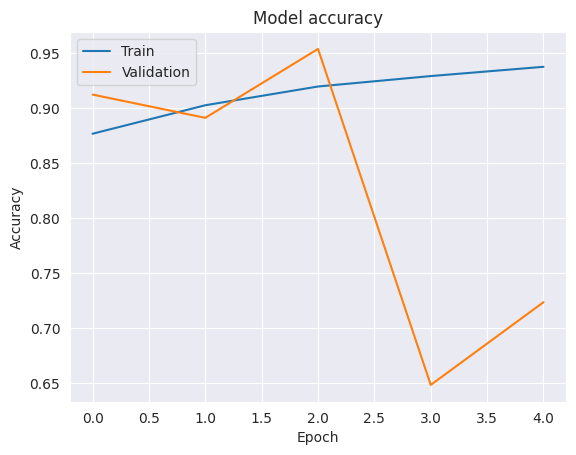

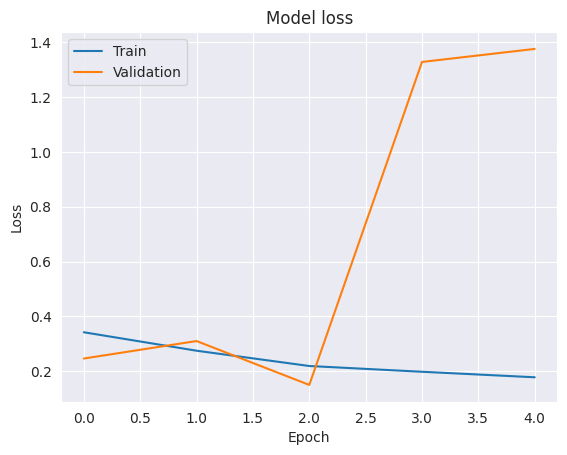

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [46]:
test_labels = test_gen_new.classes
predictions = cnn_model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

160/160 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step


In [47]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       638
           1       0.88      0.93      0.91       638
           2       0.98      0.97      0.97       638
           3       0.97      0.96      0.96       638

    accuracy                           0.94      2552
   macro avg       0.94      0.94      0.94      2552
weighted avg       0.94      0.94      0.94      2552



In [48]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

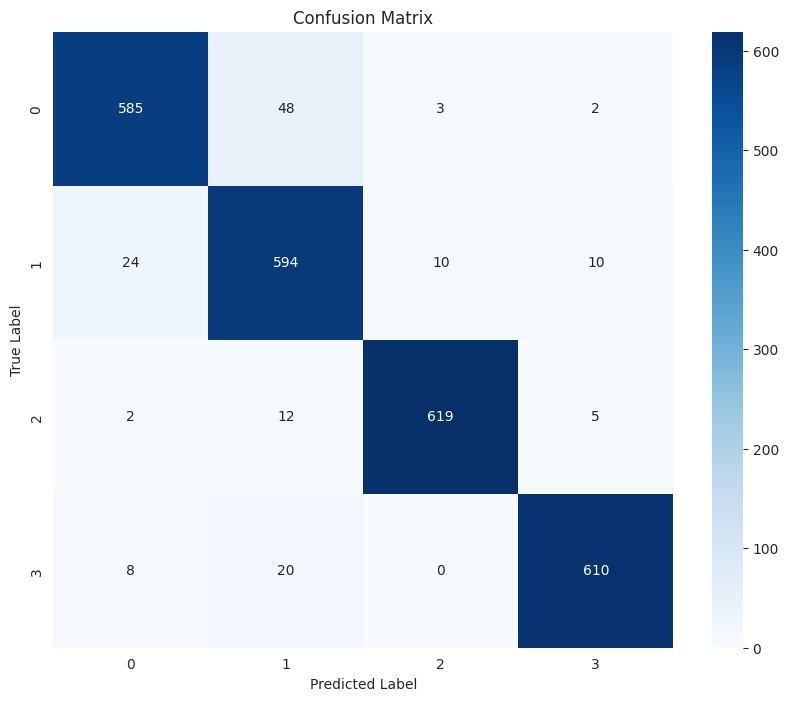

In [49]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [50]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_mobilenet_model(input_shape):

    inputs = Input(shape=input_shape)

    base_model = MobileNet(weights='imagenet', input_tensor=inputs, include_top=False)

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 7, 7, 1024
    x = Reshape((height * width, channels))(x)

    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)

    attention_output = Reshape((height, width, channels))(attention_output)

    x = GaussianNoise(0.25)(attention_output)

    x = GlobalAveragePooling2D()(x)

    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)

    outputs = Dense(4, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)

cnn_model = create_mobilenet_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [52]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 131s 102ms/step - accuracy: 0.9400 - loss: 0.1721 - val_accuracy: 0.9412 - val_loss: 0.1663
Epoch 2/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 137s 107ms/step - accuracy: 0.9616 - loss: 0.1145 - val_accuracy: 0.9538 - val_loss: 0.1602
Epoch 3/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 138s 108ms/step - accuracy: 0.9708 - loss: 0.0860 - val_accuracy: 0.9604 - val_loss: 0.1401
Epoch 4/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 142s 107ms/step - accuracy: 0.9800 - loss: 0.0594 - val_accuracy: 0.9722 - val_loss: 0.0911
Epoch 5/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 143s 108ms/step - accuracy: 0.9849 - loss: 0.0437 - val_accuracy: 0.9624 - val_loss: 0.1165


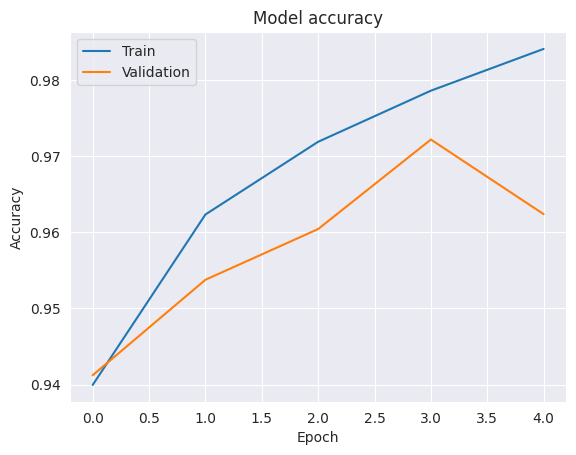

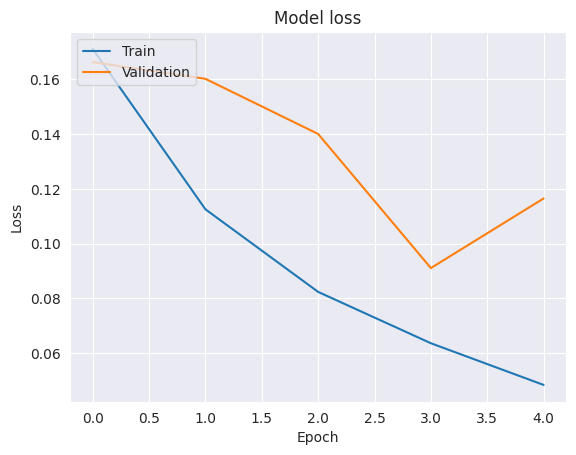

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [54]:
test_labels = test_gen_new.classes
predictions = cnn_model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

160/160 ━━━━━━━━━━━━━━━━━━━━ 16s 90ms/step


In [55]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       638
           1       0.98      0.93      0.95       638
           2       0.99      0.99      0.99       638
           3       0.97      0.98      0.97       638

    accuracy                           0.97      2552
   macro avg       0.97      0.97      0.97      2552
weighted avg       0.97      0.97      0.97      2552



In [56]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

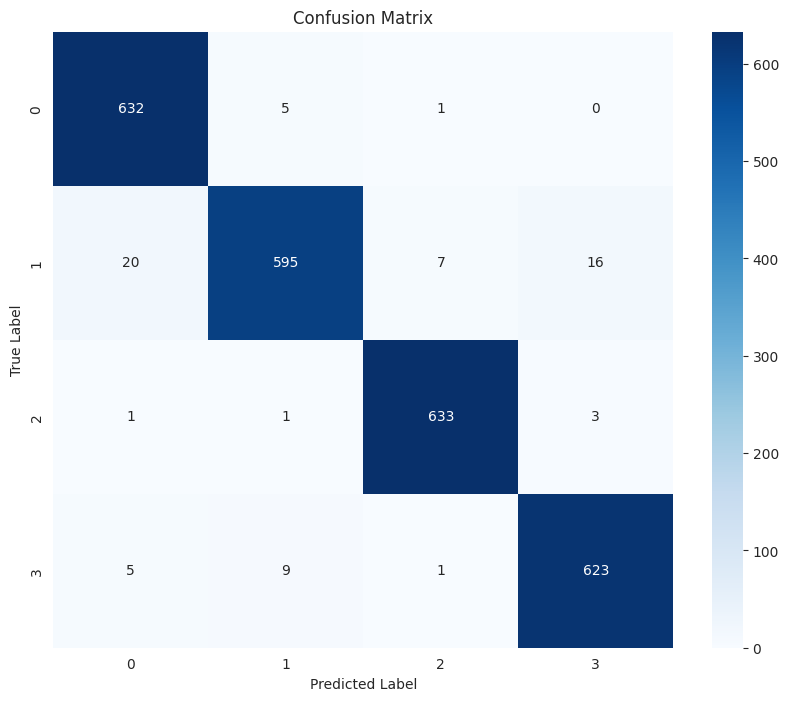

In [57]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [58]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_xception_model(input_shape):

    inputs = Input(shape=input_shape)

    base_model = Xception(weights='imagenet', input_tensor=inputs, include_top=False)

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 7, 7, 2048
    x = Reshape((height * width, channels))(x)

    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)

    attention_output = Reshape((height, width, channels))(attention_output)

    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(4, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_model = create_xception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 330s 250ms/step - accuracy: 0.7921 - loss: 0.5763 - val_accuracy: 0.7931 - val_loss: 0.5839
Epoch 2/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 315s 246ms/step - accuracy: 0.8971 - loss: 0.2932 - val_accuracy: 0.8785 - val_loss: 0.3592
Epoch 3/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 315s 246ms/step - accuracy: 0.9215 - loss: 0.2234 - val_accuracy: 0.9275 - val_loss: 0.1925
Epoch 4/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 314s 246ms/step - accuracy: 0.9432 - loss: 0.1667 - val_accuracy: 0.9471 - val_loss: 0.1511
Epoch 5/5
  83/1276 ━━━━━━━━━━━━━━━━━━━━ 4:31 227ms/step - accuracy: 0.9599 - loss: 0.1068

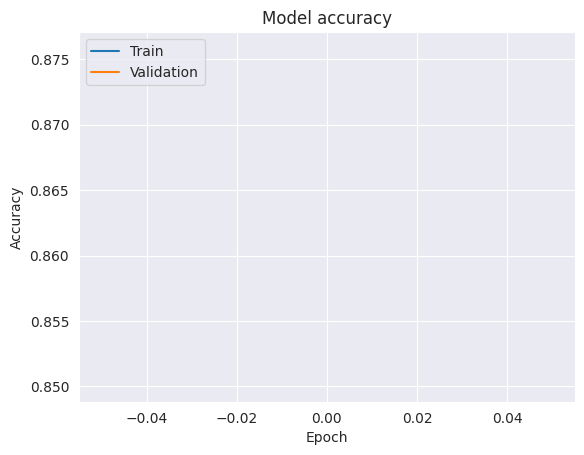

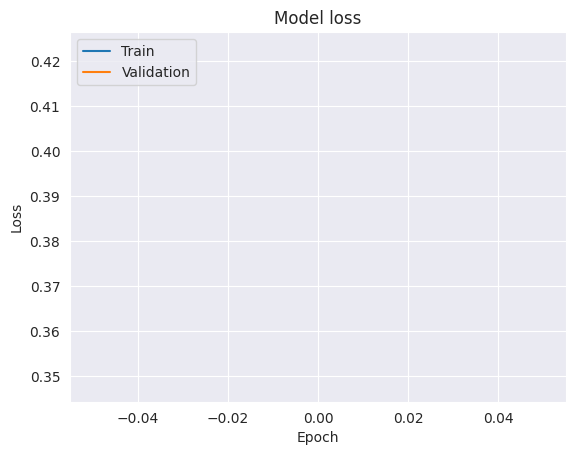

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [24]:
test_labels = test_gen_new.classes
predictions = cnn_model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

160/160 ━━━━━━━━━━━━━━━━━━━━ 643s 4s/step


In [25]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       638
           1       0.72      0.89      0.79       638
           2       0.99      0.94      0.96       638
           3       0.97      0.73      0.83       638

    accuracy                           0.87      2552
   macro avg       0.88      0.87      0.87      2552
weighted avg       0.88      0.87      0.87      2552



In [26]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

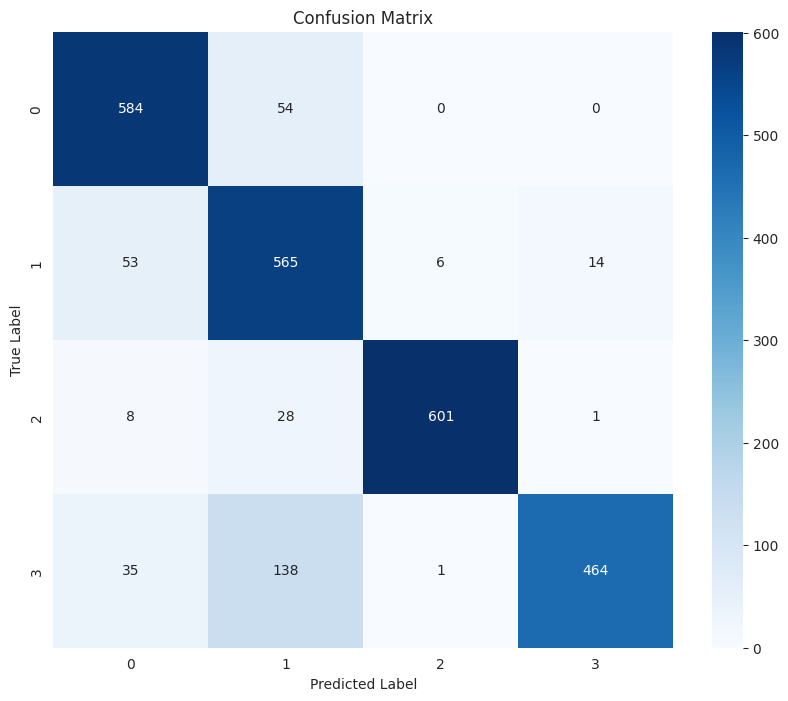

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [28]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_inception_model(input_shape):

    inputs = Input(shape=input_shape)

    base_model = InceptionV3(weights='imagenet', input_tensor=inputs, include_top=False)

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 5, 5, 2048
    x = Reshape((height * width, channels))(x)

    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)

    attention_output = Reshape((height, width, channels))(attention_output)

    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(4, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_model = create_inception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [29]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 219s 155ms/step - accuracy: 0.7820 - loss: 0.6144 - val_accuracy: 0.9052 - val_loss: 0.2867
Epoch 2/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 190s 148ms/step - accuracy: 0.9052 - loss: 0.2700 - val_accuracy: 0.8836 - val_loss: 0.3630
Epoch 3/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 202s 149ms/step - accuracy: 0.9253 - loss: 0.2086 - val_accuracy: 0.9287 - val_loss: 0.2165
Epoch 4/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 201s 148ms/step - accuracy: 0.9466 - loss: 0.1468 - val_accuracy: 0.9393 - val_loss: 0.1943
Epoch 5/5
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 183s 143ms/step - accuracy: 0.9596 - loss: 0.1139 - val_accuracy: 0.9393 - val_loss: 0.2171


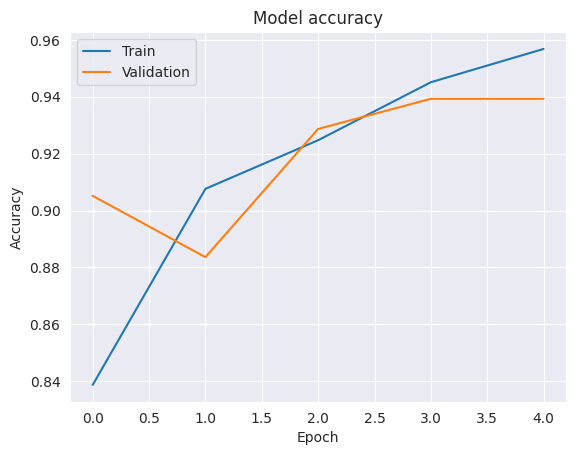

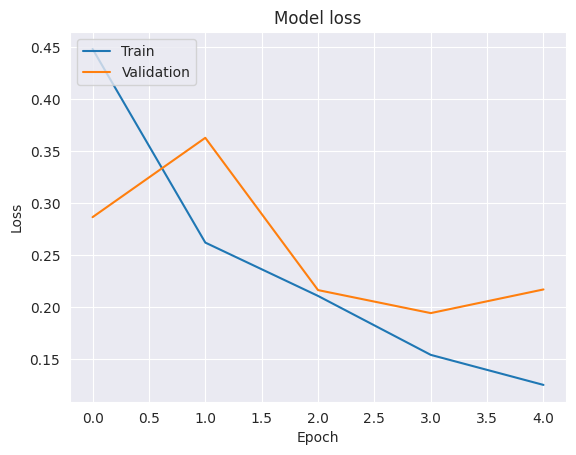

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [31]:
test_labels = test_gen_new.classes
predictions = cnn_model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

160/160 ━━━━━━━━━━━━━━━━━━━━ 23s 113ms/step


In [32]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.87      0.97      0.91       638
           1       0.94      0.81      0.87       638
           2       0.99      0.97      0.98       638
           3       0.92      0.97      0.95       638

    accuracy                           0.93      2552
   macro avg       0.93      0.93      0.93      2552
weighted avg       0.93      0.93      0.93      2552



In [33]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

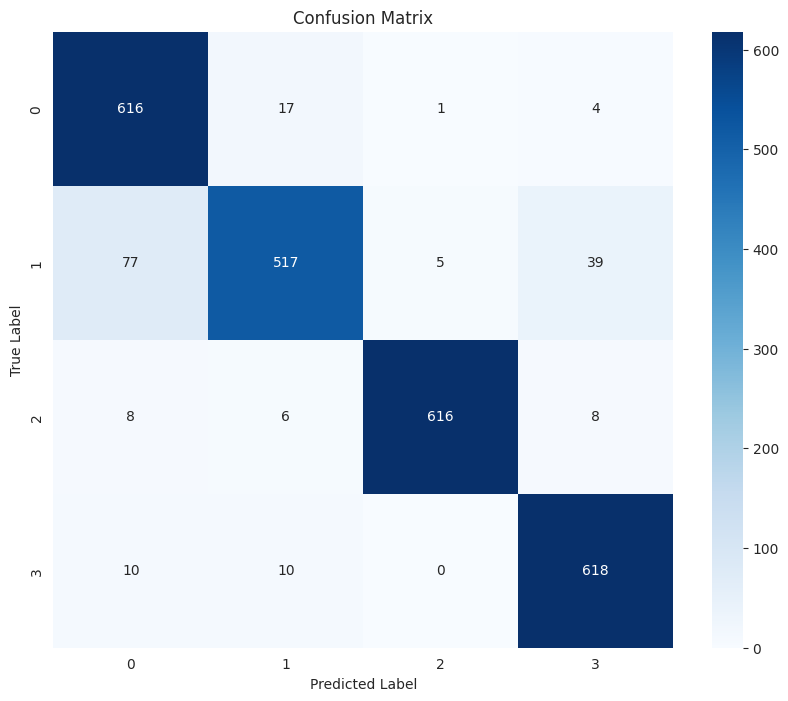

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

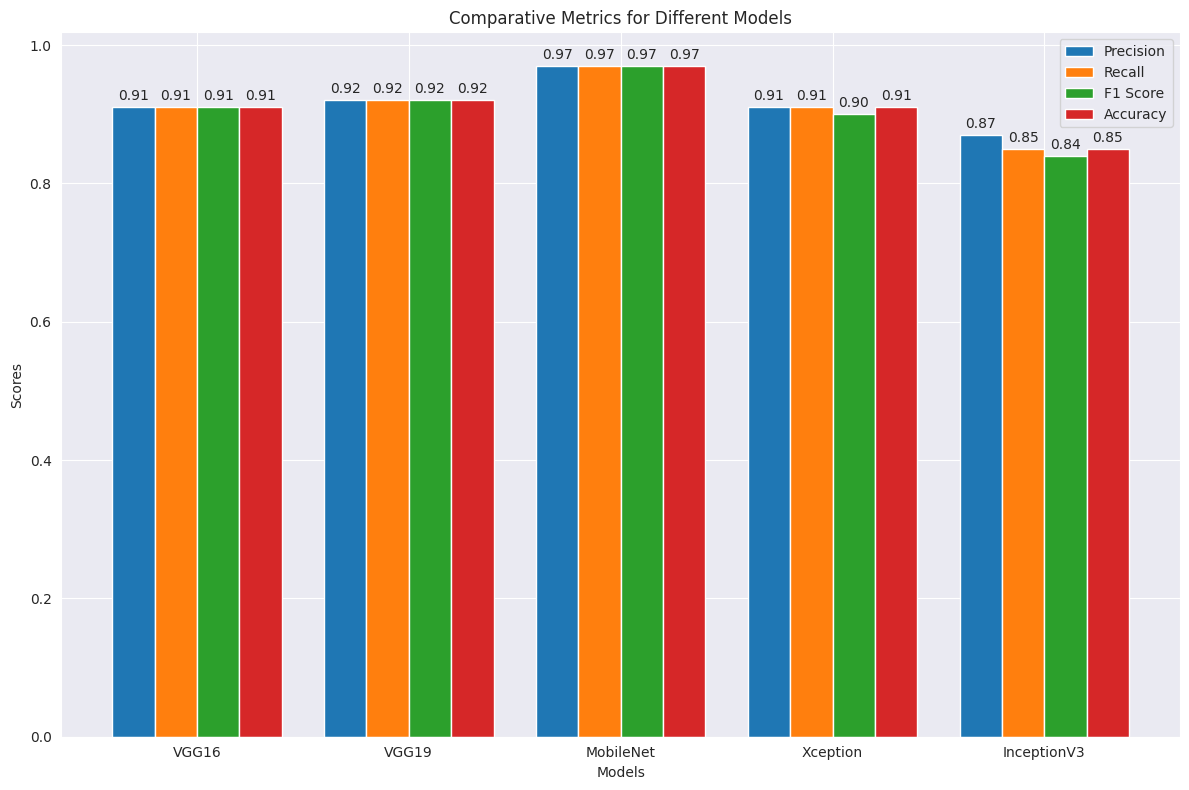

In [20]:
models = ['VGG16', 'VGG19', 'MobileNet', 'Xception', 'InceptionV3']
precision_scores = [0.91, 0.92, 0.97, 0.91, 0.87]
recall_scores = [0.91, 0.92, 0.97, 0.91, 0.85]
f1_scores = [0.91, 0.92, 0.97, 0.90, 0.84]
accuracy_scores = [0.91, 0.92, 0.97, 0.91, 0.85]

bar_width = 0.2
index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(12, 8))

bars1 = ax.bar(index, precision_scores, bar_width, label='Precision')
bars2 = ax.bar(index + bar_width, recall_scores, bar_width, label='Recall')
bars3 = ax.bar(index + 2 * bar_width, f1_scores, bar_width, label='F1 Score')
bars4 = ax.bar(index + 3 * bar_width, accuracy_scores, bar_width, label='Accuracy')

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparative Metrics for Different Models')
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()